<a href="https://colab.research.google.com/github/jovanadobreva/I2DS/blob/main/Exercise3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset from: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/melb_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df_missing_values = df.isna().sum().reset_index()

13580

In [ ]:
df_missing_values.columns = ["Datset Column","Missing values"]

In [ ]:
df_missing_values["Missing values %"] = df_missing_values["Missing values"] / len(df['Suburb']) * 100

In [ ]:
df_missing_values

,Datset Column,Missing values,Missing values %
0,Suburb,0,0.000000
1,Address,0,0.000000
2,Rooms,0,0.000000
3,Type,0,0.000000
4,Price,0,0.000000
5,Method,0,0.000000
6,SellerG,0,0.000000
7,Date,0,0.000000
8,Distance,0,0.000000
9,Postcode,0,0.000000


In [ ]:
df['Car']

0        1.0
1        0.0
2        0.0
3        1.0
4        2.0
        ... 
13575    2.0
13576    2.0
13577    4.0
13578    5.0
13579    1.0
Name: Car, Length: 13580, dtype: float64

In [ ]:
df.drop(['Missing values %'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

<Axes: >

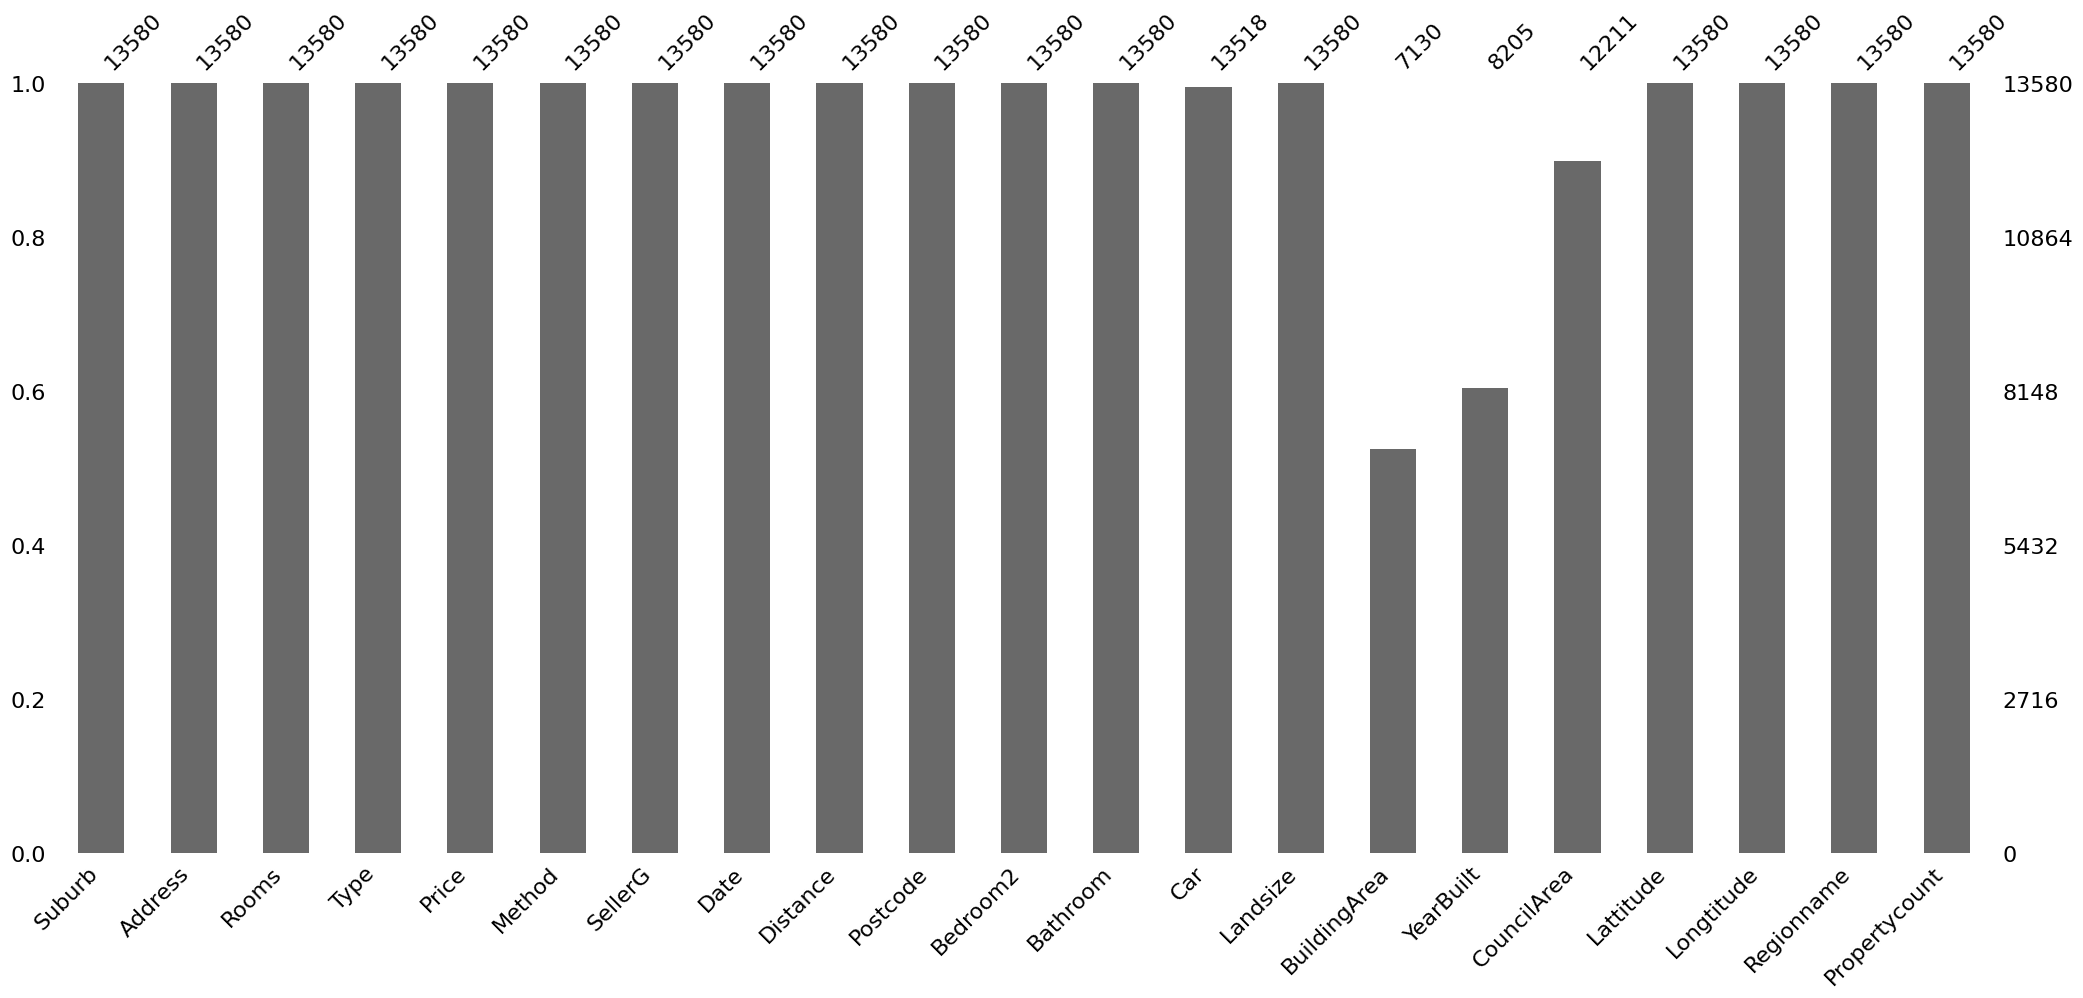

In [ ]:
import missingno as msno
msno.bar(df)

<Axes: >

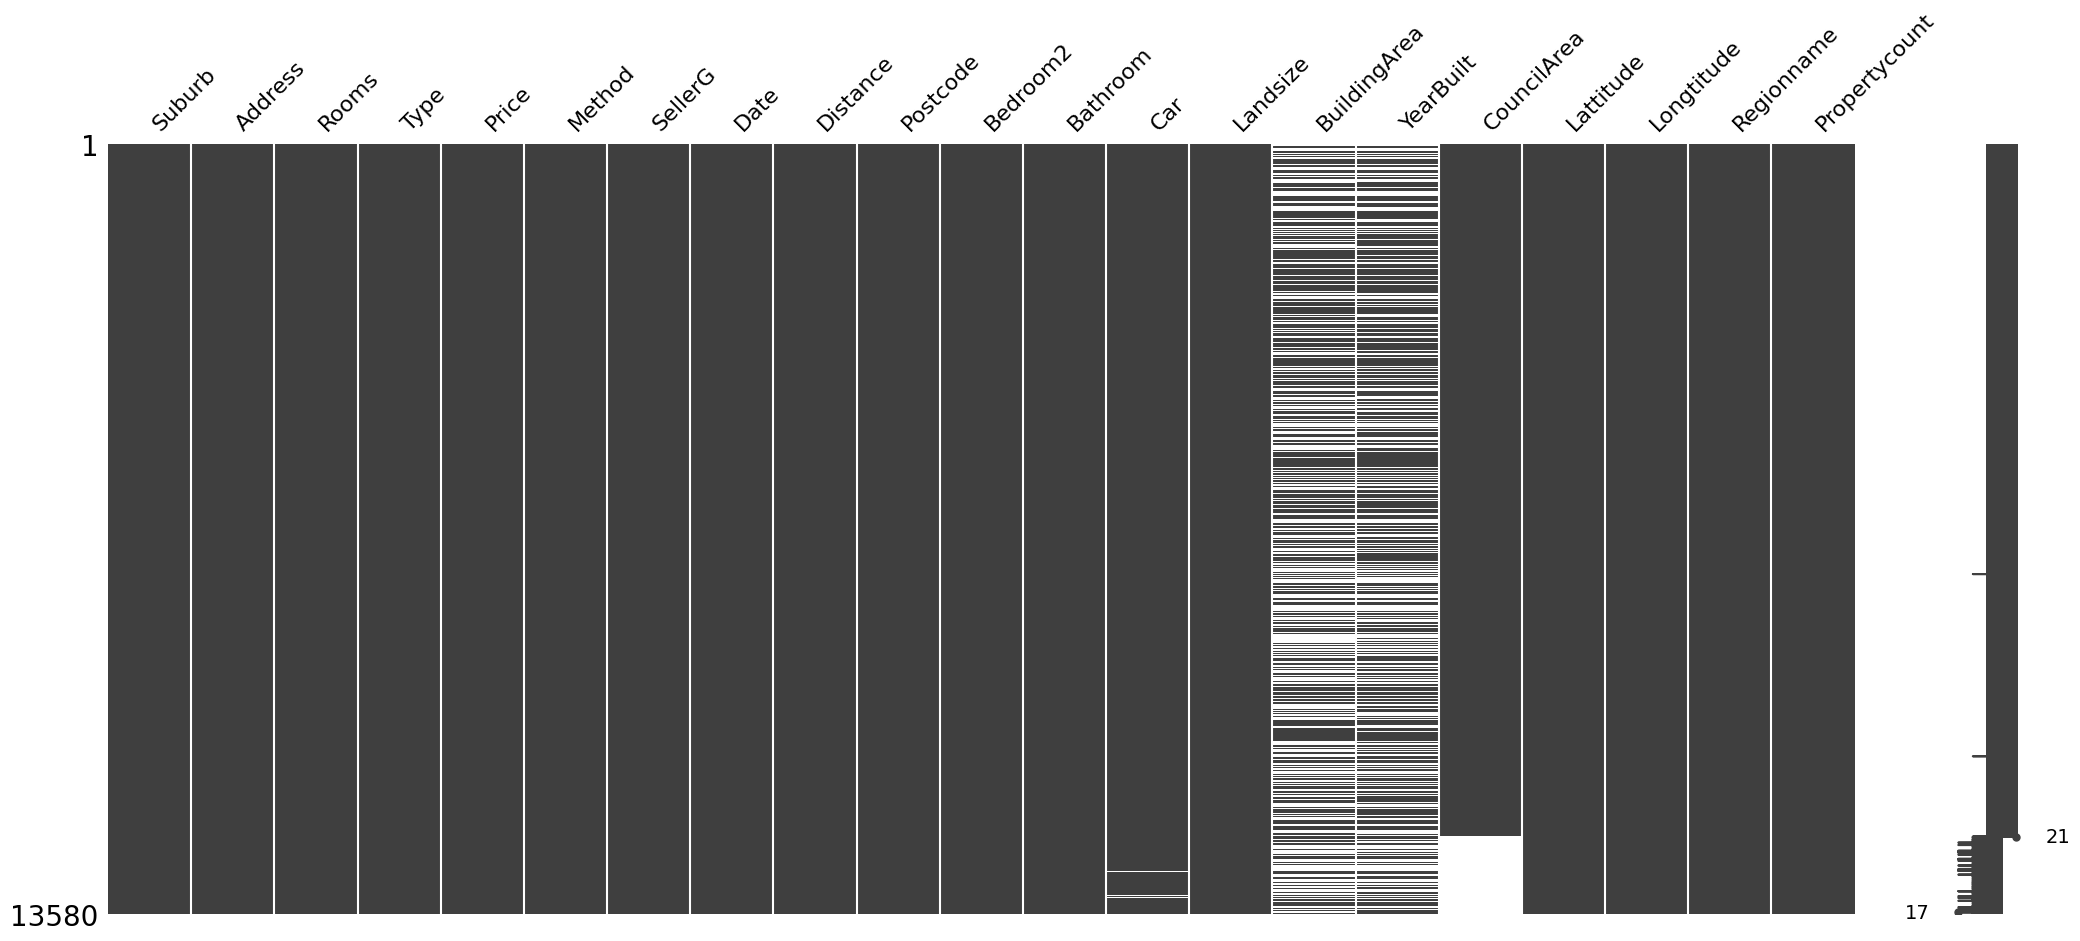

In [ ]:
msno.matrix(df)

<Axes: >

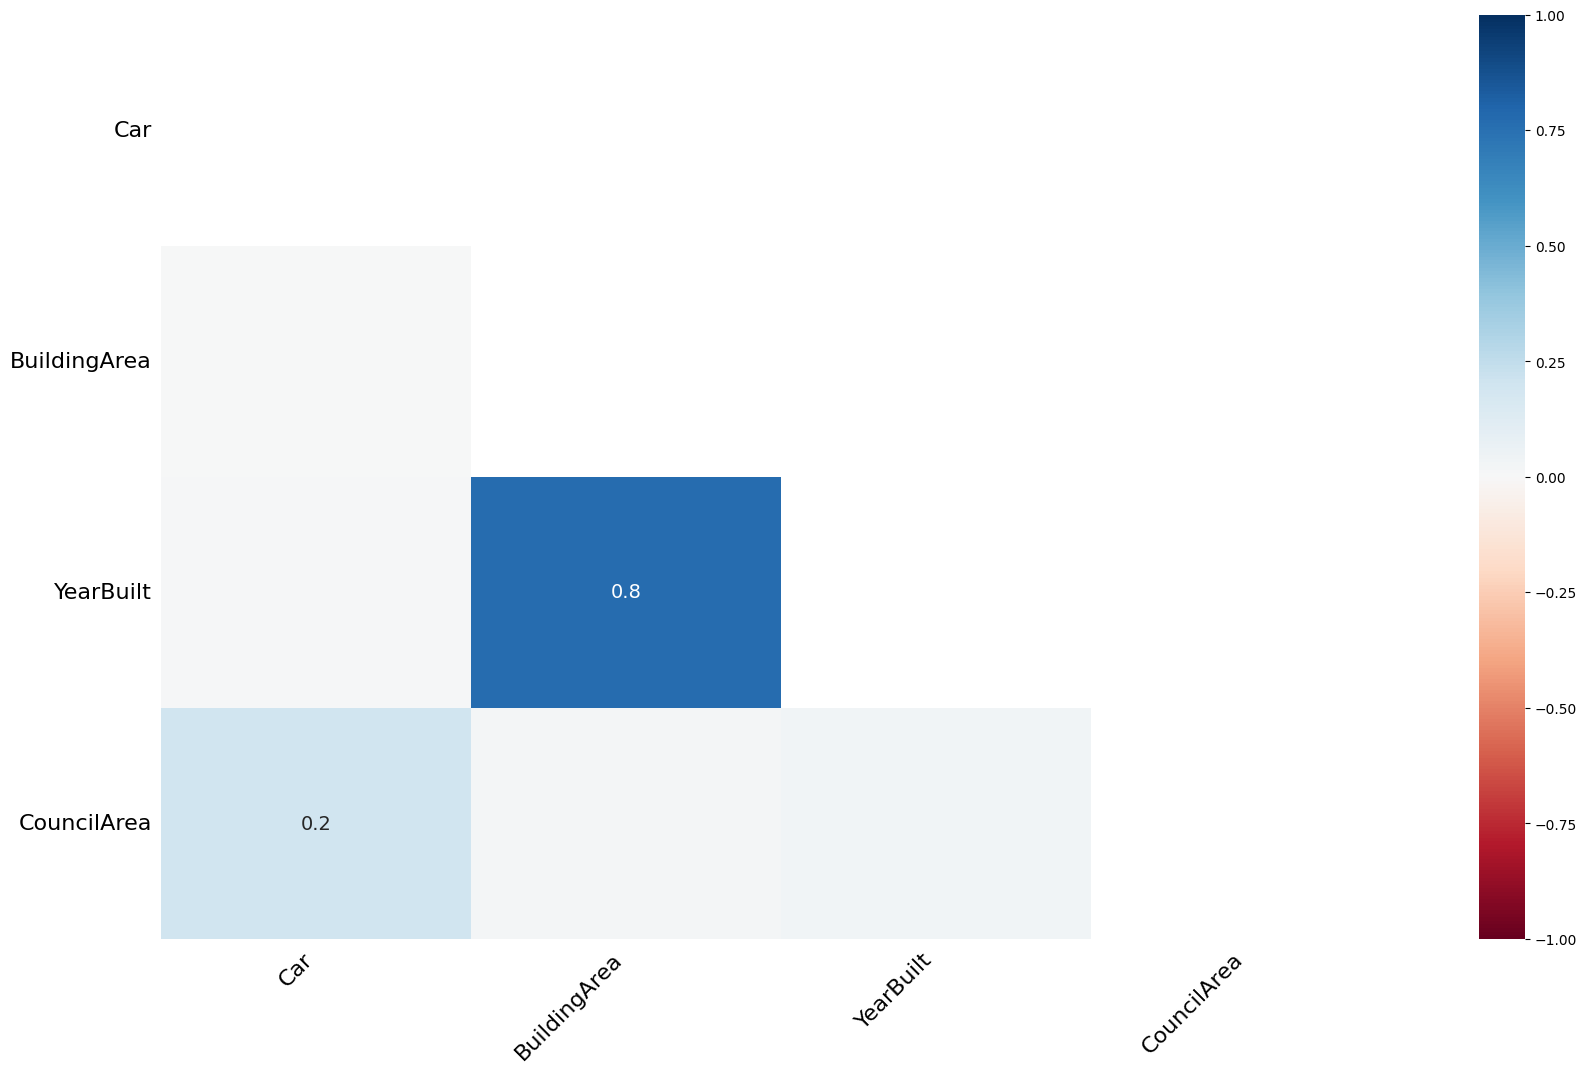

In [ ]:
msno.heatmap(df)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
dict_labels = {}
counter=0
for category in df['Suburb'].unique():
  dict_labels[category]=counter
  counter+=1

In [ ]:
dict_labels

{'Abbotsford': 0,
 'Airport West': 1,
 'Albert Park': 2,
 'Alphington': 3,
 'Altona': 4,
 'Altona North': 5,
 'Armadale': 6,
 'Ascot Vale': 7,
 'Ashburton': 8,
 'Ashwood': 9,
 'Avondale Heights': 10,
 'Balaclava': 11,
 'Balwyn': 12,
 'Balwyn North': 13,
 'Bentleigh': 14,
 'Bentleigh East': 15,
 'Box Hill': 16,
 'Braybrook': 17,
 'Brighton': 18,
 'Brighton East': 19,
 'Brunswick': 20,
 'Brunswick West': 21,
 'Bulleen': 22,
 'Burwood': 23,
 'Camberwell': 24,
 'Canterbury': 25,
 'Carlton North': 26,
 'Carnegie': 27,
 'Caulfield': 28,
 'Caulfield North': 29,
 'Caulfield South': 30,
 'Chadstone': 31,
 'Clifton Hill': 32,
 'Coburg': 33,
 'Coburg North': 34,
 'Collingwood': 35,
 'Doncaster': 36,
 'Eaglemont': 37,
 'Elsternwick': 38,
 'Elwood': 39,
 'Essendon': 40,
 'Essendon North': 41,
 'Fairfield': 42,
 'Fitzroy': 43,
 'Fitzroy North': 44,
 'Flemington': 45,
 'Footscray': 46,
 'Glen Iris': 47,
 'Glenroy': 48,
 'Gowanbrae': 49,
 'Hadfield': 50,
 'Hampton': 51,
 'Hampton East': 52,
 'Hawthorn

In [ ]:
tmp_list = []
for i in df['Suburb']:
  tmp_list.append(dict_labels[i])

In [ ]:
df['Suburb'] = tmp_list

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int64  
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
le.fit(df['Address'])

LabelEncoder()

In [ ]:
df['Address'] = le.transform(df['Address'])

In [ ]:
le.classes_

array(['1 Adelle Ct', '1 Airlie St', '1 Albion Ct', ..., '9a Russell St',
       '9a The Crossway', '9b Stewart St'], dtype=object)

In [ ]:
df['Method'] = le.fit_transform(df['Method'])

In [ ]:
le.classes_

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

In [ ]:
df['CouncilArea']=  le.fit_transform(df['CouncilArea'])

In [ ]:
import numpy as np


In [ ]:
list_tmp = []
for i in df['CouncilArea']:

  if i == 33:
    list_tmp.append(np.nan)
  else:
    list_tmp.append(i)

In [ ]:
df['CouncilArea'] = list_tmp

In [ ]:
df.iloc[0:2,:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,12794,2,h,1480000.0,1,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,0,5943,2,h,1035000.0,1,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31.0,-37.8079,144.9934,Northern Metropolitan,4019.0


In [ ]:
delete_list = []
for column in df.columns:
  if type(df[column][0]) == str and column!= 'BuildingArea' and column != 'YearBuilt':
    delete_list.append(column)

In [ ]:
delete_list

['Type', 'SellerG', 'Date', 'Regionname']

In [ ]:
df.drop(delete_list,axis=1,inplace=True)

KeyError: ignored

In [ ]:
df

,Suburb,Address,Rooms,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount
0,0,12794,2,1480000.0,1,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,31.0,-37.79960,144.99840,4019.0
1,0,5943,2,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,31.0,-37.80790,144.99340,4019.0
2,0,9814,3,1465000.0,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,31.0,-37.80930,144.99440,4019.0
3,0,9004,3,850000.0,0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,31.0,-37.79690,144.99690,4019.0
4,0,10589,4,1600000.0,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,31.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,248,1991,4,1245000.0,1,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,7392.0
13576,104,12234,3,1031000.0,3,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,6380.0
13577,104,12745,3,1170000.0,1,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,6380.0
13578,104,13311,4,2500000.0,0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,6380.0


In [ ]:
new_dataset = imputer.fit_transform(df)

In [ ]:
df_new = pd.DataFrame(new_dataset,columns=df.columns)

<Axes: >

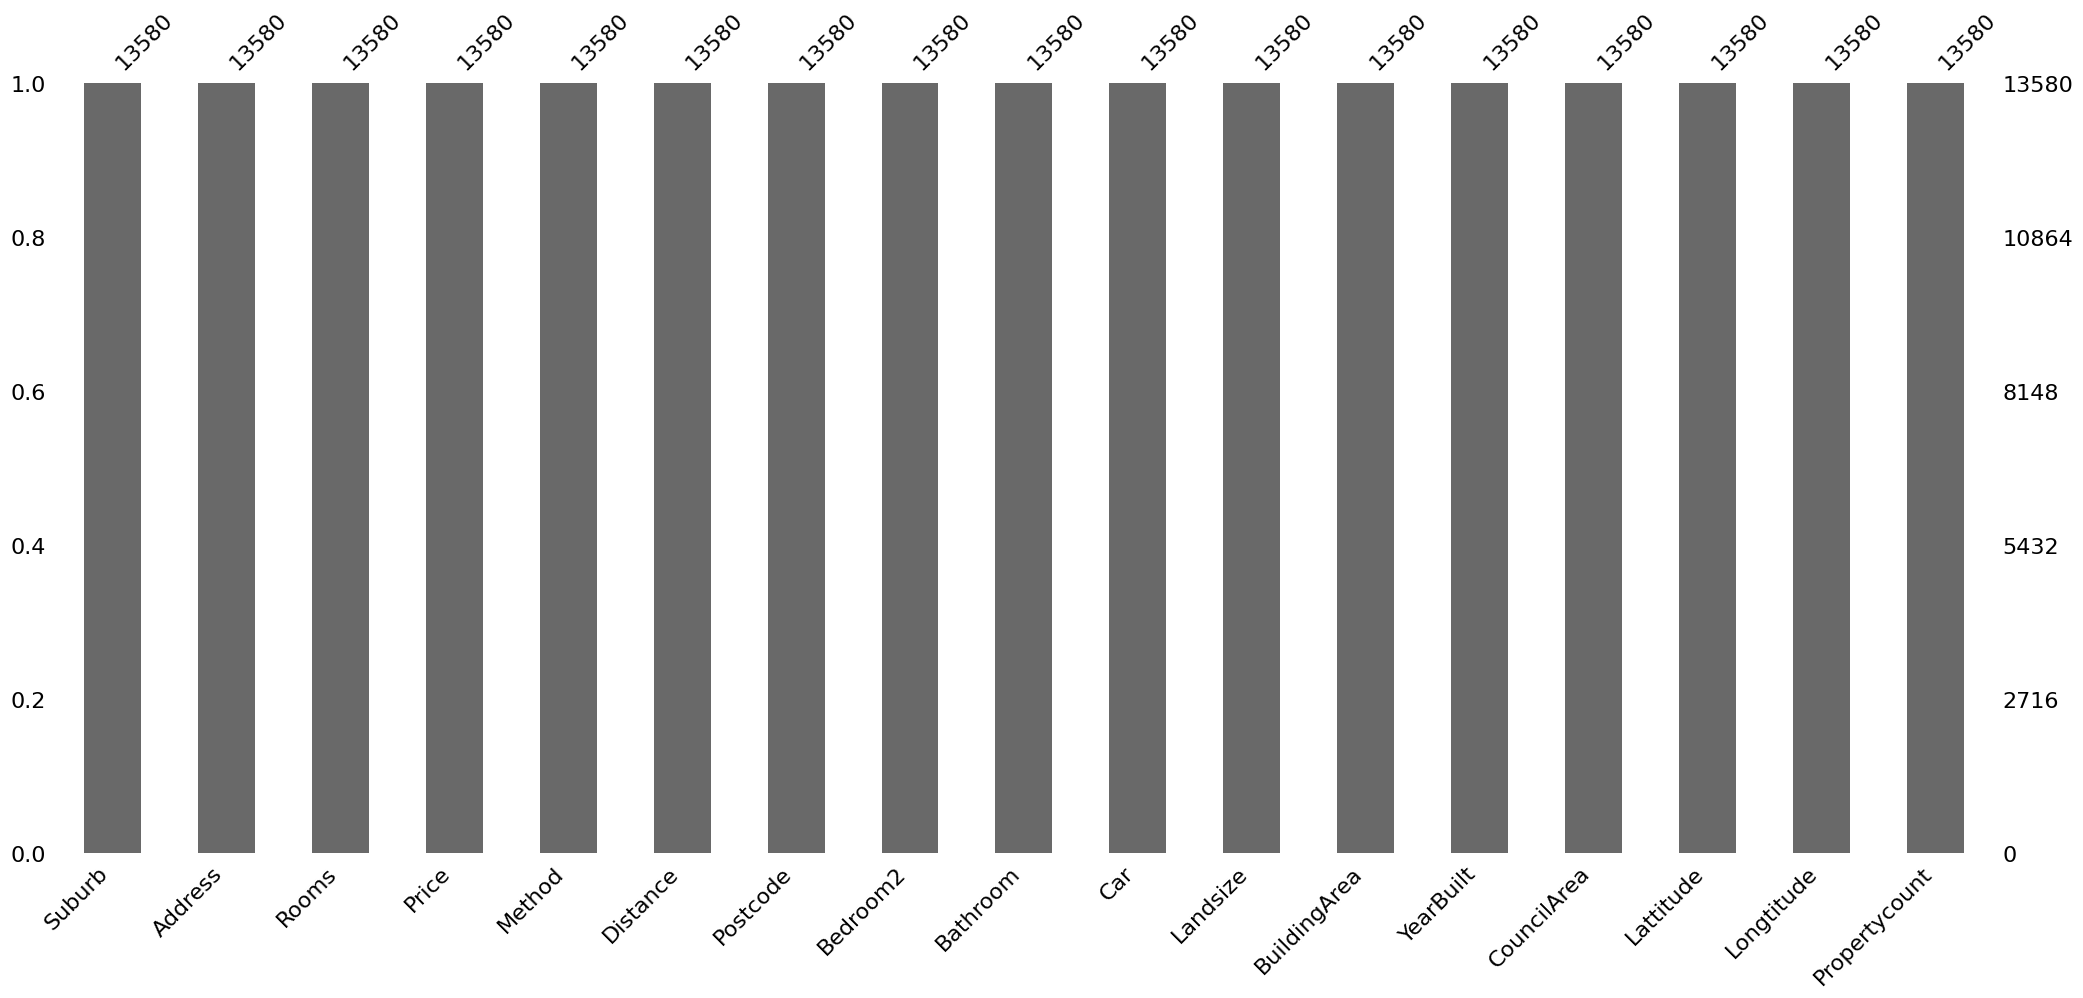

In [ ]:
msno.bar(df_new)